# Homework 1 - 2305
- Tommaso Bertola 2086990
- Giacomo Di Prima 2086992
- Giuseppe Viterbo 2086516
- Marzo Zenari 2097012

In [2]:
#DNN library
import tensorflow as tf
import keras, sklearn
from keras.models import Sequential
from keras.layers import Dense, Dropout
import tensorflow.random as tf_r


tf_r.set_seed(12345)


#common libraries
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib as mpl
mpl.rc('image', cmap='copper') #global colormap 

#random seed
seed=1
np.random.seed(seed) # fix random seed




# default font
plt.rcParams['font.size'] = 15

In [3]:
%run nonlinear_function.py #here is loaded the filename, to be run only once

In [4]:
# Keras works with numpy arrays: just use them from the start
TYPE=1
x = np.loadtxt(filename("data",TYPE), delimiter=' ')
y = np.loadtxt(filename("labels",TYPE), delimiter=' ')
N = len(x)

# dim. of a sample
L = len(x[0])
print(f'Dimension of a sample {L}')

#training percentage
perc_train = 0.8


N_train = int(perc_train * N)
print(f'data: {N}\ntrain: {N_train}')

Dimension of a sample 2
data: 4000
train: 3200


In [5]:
### Split training and test data
(x_train, y_train) = (x[0:N_train],y[0:N_train]) #they are already shuffle 
(x_valid, y_valid) = (x[N_train:],y[N_train:])
print("Train:",len(x_train),"\t Validation:",len(x_valid))

Train: 3200 	 Validation: 800


In [6]:
### Rescale input data

def Rescale(x):
    return x/50 #the number goes from -50 to 50, so we put them between -1 and 1 to use the non linearity 

x_train = Rescale(x_train)
x_valid = Rescale(x_valid)

### Define the model with Keras / Tensorflow

In [7]:
def create_DNN(act_func, neurons): 
    model = Sequential() #empty template of the neural network
    model.add(Dense(L,input_shape=(L,),activation=act_func)) #add a layer dense (all connection) with a ReLu 2 neuron for 2 x_i
    model.add(Dense(units=neurons,activation=act_func))
    model.add(Dense(units=neurons,activation=act_func))
    model.add(Dense(units=neurons,activation=act_func))
    model.add(Dropout(0.01)) #it is applied to the last layer, need to be reader in keras documentation 
    model.add(Dense(1,activation='sigmoid'))
        
    return model 

### Optimization method and cost function

In [8]:
def compile_model(optimizer='adam', act_func='relu', neurons=30):
    model = create_DNN(act_func, neurons)
    model.compile(loss='binary_crossentropy',
                  optimizer=optimizer,
                  metrics=['accuracy'])    
    return model

In [9]:
nepochs=300

model = compile_model(optimizer='Adam',
                      act_func='ReLU',
                      neurons=30)

history = model.fit(x_train, y_train,
                    epochs = nepochs,
                    batch_size = 10,
                    validation_data=(x_valid,y_valid),
                    verbose=1)

Epoch 1/300
320/320 [==============================] - 2s 3ms/step - loss: 0.5850 - accuracy: 0.7019 - val_loss: 0.5646 - val_accuracy: 0.6975
Epoch 2/300
320/320 [==============================] - 1s 2ms/step - loss: 0.5019 - accuracy: 0.7506 - val_loss: 0.5135 - val_accuracy: 0.7437
Epoch 3/300
320/320 [==============================] - 1s 3ms/step - loss: 0.4649 - accuracy: 0.7738 - val_loss: 0.4772 - val_accuracy: 0.7600
Epoch 4/300
320/320 [==============================] - 1s 2ms/step - loss: 0.4432 - accuracy: 0.7847 - val_loss: 0.4521 - val_accuracy: 0.7713
Epoch 5/300
320/320 [==============================] - 1s 3ms/step - loss: 0.4290 - accuracy: 0.7891 - val_loss: 0.4430 - val_accuracy: 0.7788
Epoch 6/300
320/320 [==============================] - 1s 2ms/step - loss: 0.4184 - accuracy: 0.7969 - val_loss: 0.4238 - val_accuracy: 0.7837
Epoch 7/300
320/320 [==============================] - 1s 2ms/step - loss: 0.4125 - accuracy: 0.7997 - val_loss: 0.4157 - val_accuracy: 0.7862

## Plotting accuracy and loss functions

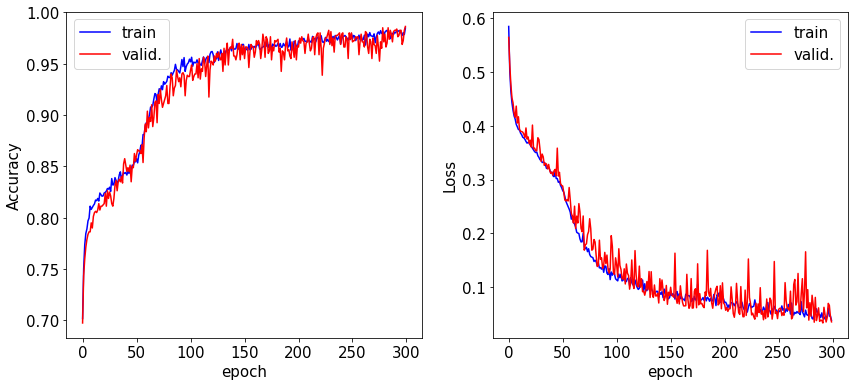

In [10]:
fig,AX=plt.subplots(1,2,figsize=(14,6.))
ax=AX[0]
ax.plot(history.history['accuracy'],label="train",c="b")
ax.plot(history.history['val_accuracy'],label="valid.",c="r")
ax.set_xlabel('epoch')
ax.set_ylabel("Accuracy")
ax.legend()
ax=AX[1]
ax.plot(history.history['loss'],label="train",c="b")
ax.plot(history.history['val_loss'],label="valid.",c="r")
ax.set_xlabel('epoch')
ax.set_ylabel("Loss")
ax.legend()

In [11]:
dX = 2
X1 = np.arange(-50,50+dX, dX)
LG = len(X1)
grid = np.zeros((LG*LG,2))
k=0
for i in range(LG):
    for j in range(LG):
        grid[k,:]=(X1[j],X1[i])
        k=k+1
print(len(X1),len(grid))
print(grid[-1])

# RESCALE

grid_r = grid/50

pred = model.predict(grid_r)

51 2601
[50. 50.]


<function matplotlib.pyplot.show(close=None, block=None)>

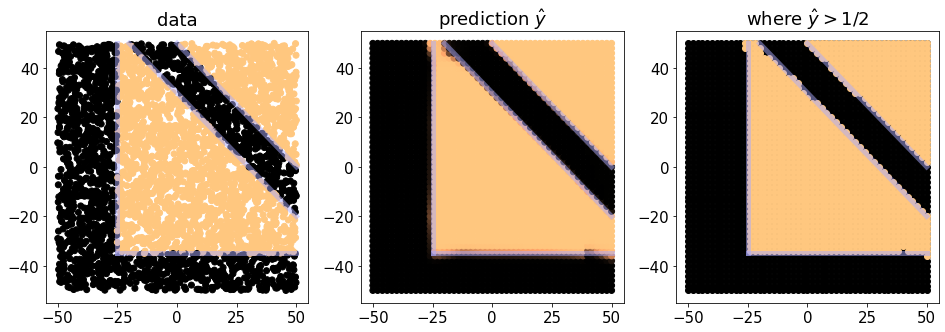

In [12]:
def boundaries():  
    x1=-25
    y1=-35
    c="#AAAAFF"
    a=0.5
    lw=5
    ax.plot((50,-20),(-20,50),c=c,alpha=a,lw=lw)
    ax.plot((50,0),(0,50),c=c,alpha=a,lw=lw)
    ax.plot((x1,50),(y1,y1),c=c,alpha=a,lw=lw)
    ax.plot((x1,x1),(y1,50),c=c,alpha=a,lw=lw)


fig,AX=plt.subplots(1,3,figsize=(16,5.))
ax=AX[0]
ax.scatter(x[:,0],x[:,1],c=y)
boundaries()
ax.set_title("data")
ax=AX[1]
ax.scatter(grid[:,0],grid[:,1],c=pred)
boundaries()
ax.set_title("prediction $\\hat y$")
ax=AX[2]
W1=np.where(pred>0.5)[0] 
ax.scatter(grid[:,0],grid[:,1],c="#000000")
ax.scatter(grid[W1,0],grid[W1,1],c="#ffc77f")
boundaries()
ax.set_title("where $\\hat y > 1/2$")
plt.show
plt.show

## EX.1 Modify the Hyperparameters to Optimize Performance of the Model

In [14]:
from sklearn.model_selection import GridSearchCV
from scikeras.wrappers import KerasClassifier

In [16]:
# list of allowed optional arguments for the optimizer, see `compile_model()`
optimizer = ['Adammax', 'RMSprop', 'Adam']
act_func = ['sigmoid','tanh', 'ReLU']
batch_size = [10, 50]
neurons = [20, 30]
nepochs = 50

# call Keras scikit wrapper
model_gridsearch = KerasClassifier(model=compile_model, 
                        epochs=nepochs, 
                        batch_size=batch_size,
                        act_func=act_func,
                        model__neurons=neurons,
                        verbose=1)

# define parameter dictionary
param_grid = dict(optimizer=optimizer,
                  act_func=act_func,
                  batch_size=batch_size,
                  model__neurons=neurons)

print(param_grid)


# call scikit grid search module
grid = GridSearchCV(estimator=model_gridsearch, param_grid=param_grid, n_jobs=-1, cv=4)

{'optimizer': ['Adammax', 'RMSprop', 'Adam'], 'act_func': ['sigmoid', 'tanh', 'ReLU'], 'batch_size': [10, 50], 'model__neurons': [20, 30]}


In [17]:
grid_result = grid.fit(x_train, y_train)

Epoch 1/50
320/320 [==============================] - 1s 2ms/step - loss: 0.6140 - accuracy: 0.6787
Epoch 2/50
320/320 [==============================] - 1s 2ms/step - loss: 0.5872 - accuracy: 0.6981
Epoch 3/50
320/320 [==============================] - 1s 2ms/step - loss: 0.5430 - accuracy: 0.7294
Epoch 4/50
320/320 [==============================] - 1s 2ms/step - loss: 0.5011 - accuracy: 0.7644
Epoch 5/50
320/320 [==============================] - 1s 2ms/step - loss: 0.4773 - accuracy: 0.7869
Epoch 6/50
320/320 [==============================] - 1s 2ms/step - loss: 0.4463 - accuracy: 0.8097
Epoch 7/50
320/320 [==============================] - 1s 2ms/step - loss: 0.4087 - accuracy: 0.8331
Epoch 8/50
320/320 [==============================] - 1s 2ms/step - loss: 0.3687 - accuracy: 0.8481
Epoch 9/50
320/320 [==============================] - 1s 2ms/step - loss: 0.3439 - accuracy: 0.8553
Epoch 10/50
320/320 [==============================] - 1s 2ms/step - loss: 0.3244 - accuracy: 0.8547

In [18]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.968437 using {'act_func': 'tanh', 'batch_size': 10, 'model__neurons': 30, 'optimizer': 'Adam'}
0.766563 (0.010246) with: {'act_func': 'sigmoid', 'batch_size': 10, 'model__neurons': 20, 'optimizer': 'Adammax'}
0.765938 (0.009976) with: {'act_func': 'sigmoid', 'batch_size': 10, 'model__neurons': 20, 'optimizer': 'RMSprop'}
0.765937 (0.010169) with: {'act_func': 'sigmoid', 'batch_size': 10, 'model__neurons': 20, 'optimizer': 'Adam'}
0.762500 (0.013199) with: {'act_func': 'sigmoid', 'batch_size': 10, 'model__neurons': 30, 'optimizer': 'Adammax'}
0.765000 (0.009561) with: {'act_func': 'sigmoid', 'batch_size': 10, 'model__neurons': 30, 'optimizer': 'RMSprop'}
0.784375 (0.023006) with: {'act_func': 'sigmoid', 'batch_size': 10, 'model__neurons': 30, 'optimizer': 'Adam'}
0.746250 (0.015737) with: {'act_func': 'sigmoid', 'batch_size': 50, 'model__neurons': 20, 'optimizer': 'Adammax'}
0.747500 (0.010346) with: {'act_func': 'sigmoid', 'batch_size': 50, 'model__neurons': 20, 'optimizer': 'R

In [19]:
print(f'The best parameters are:{grid_result.best_params_},\nwhith a score of {grid_result.best_score_}')

The best parameters are:{'act_func': 'tanh', 'batch_size': 10, 'model__neurons': 30, 'optimizer': 'Adam'},
whith a score of 0.9684375


In [20]:
nepochs=400

model_complete = compile_model(optimizer=grid_result.best_params_['optimizer'], 
                      act_func=grid_result.best_params_['act_func'],
                      neurons=grid_result.best_params_['model__neurons'])

history_complete = model_complete.fit(x_train, y_train,
                    epochs = nepochs,
                    batch_size = grid_result.best_params_['batch_size'],
                    validation_data=(x_valid,y_valid),
                    verbose=1)

Epoch 1/400
320/320 [==============================] - 2s 4ms/step - loss: 0.6090 - accuracy: 0.6747 - val_loss: 0.5986 - val_accuracy: 0.6825
Epoch 2/400
320/320 [==============================] - 1s 3ms/step - loss: 0.5959 - accuracy: 0.6791 - val_loss: 0.6021 - val_accuracy: 0.6775
Epoch 3/400
320/320 [==============================] - 1s 2ms/step - loss: 0.5941 - accuracy: 0.6753 - val_loss: 0.6030 - val_accuracy: 0.6875
Epoch 4/400
320/320 [==============================] - 1s 2ms/step - loss: 0.5934 - accuracy: 0.6791 - val_loss: 0.5995 - val_accuracy: 0.6837
Epoch 5/400
320/320 [==============================] - 1s 2ms/step - loss: 0.5863 - accuracy: 0.6869 - val_loss: 0.5880 - val_accuracy: 0.7225
Epoch 6/400
320/320 [==============================] - 1s 2ms/step - loss: 0.5402 - accuracy: 0.7325 - val_loss: 0.5133 - val_accuracy: 0.7450
Epoch 7/400
320/320 [==============================] - 1s 2ms/step - loss: 0.4988 - accuracy: 0.7569 - val_loss: 0.4859 - val_accuracy: 0.7688

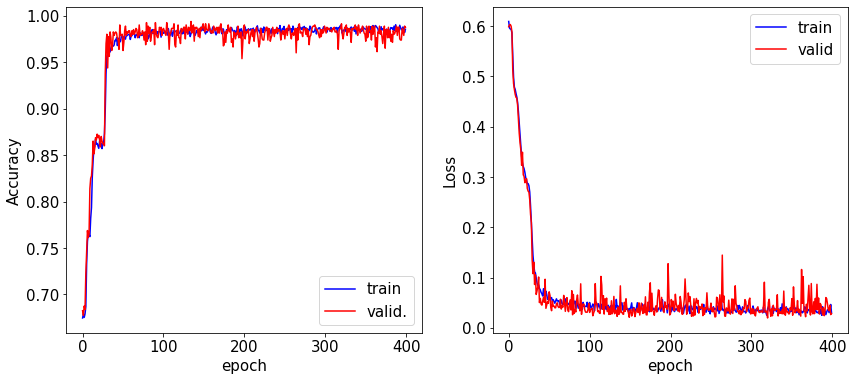

In [21]:
fig,AX=plt.subplots(1,2,figsize=(14,6.))
ax=AX[0]
ax.plot(history_complete.history['accuracy'],label="train",c="b")
ax.plot(history_complete.history['val_accuracy'],label="valid.",c="r")
ax.set_xlabel('epoch')
ax.set_ylabel("Accuracy")
ax.legend()
ax=AX[1]
ax.plot(history_complete.history['loss'],label="train",c="b")
ax.plot(history_complete.history['val_loss'],label="valid",c="r")
ax.set_xlabel('epoch')
ax.set_ylabel("Loss")
ax.legend()

51 2601
[50. 50.]


<function matplotlib.pyplot.show(close=None, block=None)>

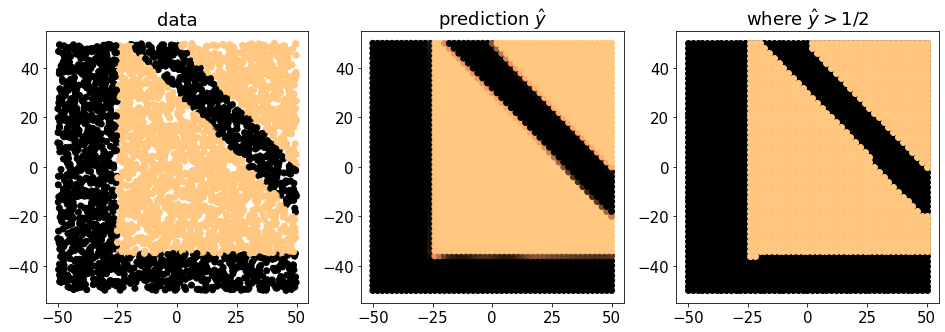

In [22]:
dX = 2
X1 = np.arange(-50,50+dX, dX)
LG = len(X1)
grid = np.zeros((LG*LG,2))
k=0
for i in range(LG):
    for j in range(LG):
        grid[k,:]=(X1[j],X1[i])
        k=k+1
print(len(X1),len(grid))
print(grid[-1])

# RESCALE

grid_r = grid/50

pred = model_complete.predict(grid_r)

fig,AX=plt.subplots(1,3,figsize=(16,5.))
ax=AX[0]
ax.scatter(x[:,0],x[:,1],c=y)
ax.set_title("data")

ax=AX[1]
ax.scatter(grid[:,0],grid[:,1],c=pred)
ax.set_title("prediction $\\hat y$")

ax=AX[2]
W1=np.where(pred>0.5)[0] 
ax.scatter(grid[:,0],grid[:,1],c="#000000")
ax.scatter(grid[W1,0],grid[W1,1],c="#ffc77f")
ax.set_title("where $\\hat y > 1/2$")
plt.show
plt.show

## Ex.2 Change the number of sample 

### Reduced number of sample

In [34]:
x = np.loadtxt(filename("data",TYPE), delimiter=' ')
y = np.loadtxt(filename("labels",TYPE), delimiter=' ')

red_val=0.10
(x, y) = (x[:int(red_val*len(x))], y[:int(red_val*len(x))])

N=len(x)
perc_train=0.8
N_train = int(N*perc_train)

(x_train, y_train) = (x[0:N_train],y[0:N_train]) #they are already shuffle 
(x_valid, y_valid) = (x[N_train:],y[N_train:])
print("Train:",len(x_train),"\t Validation:",len(x_valid))


x_train = Rescale(x_train)
x_valid = Rescale(x_valid)

Train: 320 	 Validation: 80


<function matplotlib.pyplot.show(close=None, block=None)>

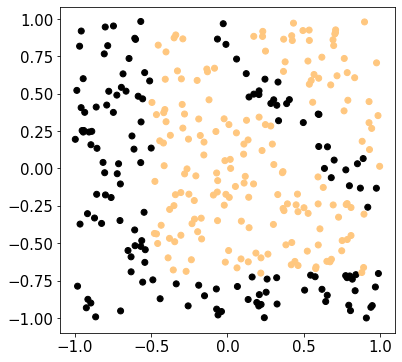

In [35]:
plt.figure(figsize = (6,6))
plt.scatter(x_train[:,0],x_train[:,1],c=y_train)
plt.show

In [36]:
#optimization
nepochs=400
model_reduced = compile_model(optimizer=grid_result.best_params_['optimizer'], 
                              act_func=grid_result.best_params_['act_func'],
                              neurons=grid_result.best_params_['model__neurons'])

history_reduced = model_reduced.fit(x_train, y_train,
                                    epochs = nepochs,
                                    batch_size = grid_result.best_params_['batch_size'],
                                    validation_data=(x_valid,y_valid),
                                    verbose=1)

Epoch 1/400
32/32 [==============================] - 1s 10ms/step - loss: 0.6349 - accuracy: 0.6406 - val_loss: 0.5710 - val_accuracy: 0.7500
Epoch 2/400
32/32 [==============================] - 0s 5ms/step - loss: 0.6215 - accuracy: 0.6719 - val_loss: 0.5562 - val_accuracy: 0.7625
Epoch 3/400
32/32 [==============================] - 0s 5ms/step - loss: 0.6206 - accuracy: 0.6875 - val_loss: 0.5535 - val_accuracy: 0.7625
Epoch 4/400
32/32 [==============================] - 0s 4ms/step - loss: 0.6185 - accuracy: 0.6969 - val_loss: 0.5560 - val_accuracy: 0.7500
Epoch 5/400
32/32 [==============================] - 0s 5ms/step - loss: 0.6201 - accuracy: 0.6906 - val_loss: 0.5538 - val_accuracy: 0.7500
Epoch 6/400
32/32 [==============================] - 0s 4ms/step - loss: 0.6218 - accuracy: 0.6812 - val_loss: 0.5495 - val_accuracy: 0.7500
Epoch 7/400
32/32 [==============================] - 0s 5ms/step - loss: 0.6206 - accuracy: 0.6594 - val_loss: 0.5570 - val_accuracy: 0.7500
Epoch 8/400


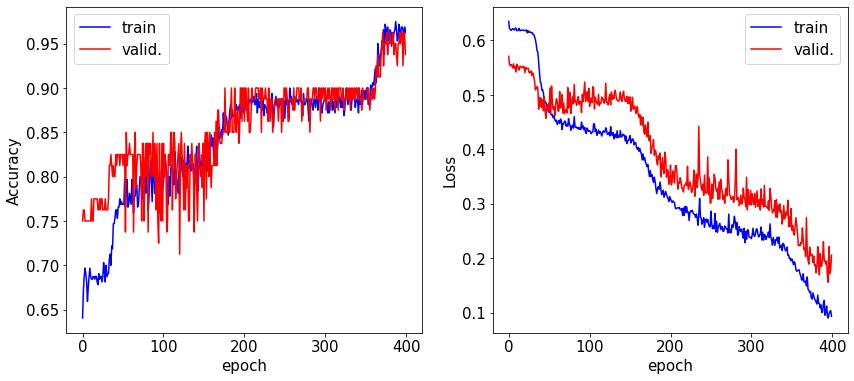

In [37]:
fig,AX=plt.subplots(1,2,figsize=(14,6.))
ax=AX[0]
ax.plot(history_reduced.history['accuracy'],label="train",c="b")
ax.plot(history_reduced.history['val_accuracy'],label="valid.",c="r")
ax.set_xlabel('epoch')
ax.set_ylabel("Accuracy")
ax.legend()
ax=AX[1]
ax.plot(history_reduced.history['loss'],label="train",c="b")
ax.plot(history_reduced.history['val_loss'],label="valid.",c="r")
ax.set_xlabel('epoch')
ax.set_ylabel("Loss")
ax.legend()

51 2601
[50. 50.]


<function matplotlib.pyplot.show(close=None, block=None)>

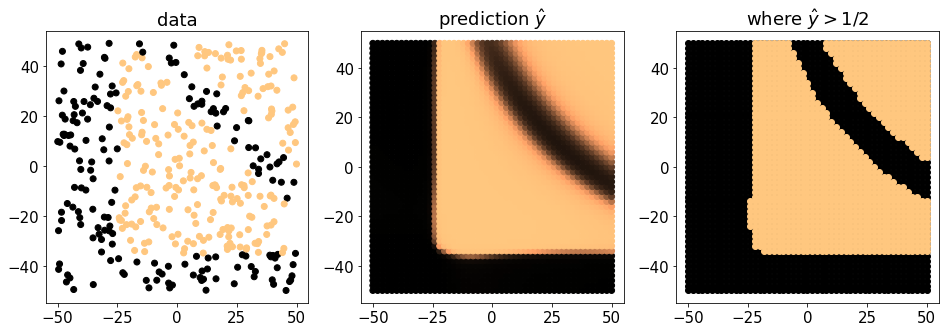

In [38]:
dX = 2
X1 = np.arange(-50,50+dX, dX)
LG = len(X1)
grid = np.zeros((LG*LG,2))
k=0
for i in range(LG):
    for j in range(LG):
        grid[k,:]=(X1[j],X1[i])
        k=k+1
print(len(X1),len(grid))
print(grid[-1])

# RESCALE

grid_r = grid/50

pred = model_reduced.predict(grid_r)

fig,AX=plt.subplots(1,3,figsize=(16,5.))
ax=AX[0]
ax.scatter(x[:,0],x[:,1],c=y)
ax.set_title("data")

ax=AX[1]
ax.scatter(grid[:,0],grid[:,1],c=pred)
ax.set_title("prediction $\\hat y$")

ax=AX[2]
W1=np.where(pred>0.5)[0] 
ax.scatter(grid[:,0],grid[:,1],c="#000000")
ax.scatter(grid[W1,0],grid[W1,1],c="#ffc77f")
ax.set_title("where $\\hat y > 1/2$")
plt.show
plt.show

#### We empirically verified that a reasenable lower treshold for a successful outcome is about 10% of the original training data size

### Increased number of sample
We generated two additional file where the numeber of sample is 6000 using the same generate_data_DNN_2023 notebook. In reality this would not be possible as data are often not easily accessible. In that scenario, we would only have used only part of the original dataset in the first part of this notebook and the whole dataset for this latter case.

In [39]:
x = np.loadtxt(filename("data_increased",TYPE), delimiter=' ')
y = np.loadtxt(filename("labels_increased",TYPE), delimiter=' ')

N=len(x)
perc_train=0.8
N_train = int(N*perc_train)

(x_train, y_train) = (x[0:N_train],y[0:N_train]) #they are already shuffle 
(x_valid, y_valid) = (x[N_train:],y[N_train:])
print("Train:",len(x_train),"\t Validation:",len(x_valid))

x_train = Rescale(x_train)
x_valid = Rescale(x_valid)

Train: 4800 	 Validation: 1200


In [41]:
#optimization
nepochs=200
model_increased = compile_model(optimizer=grid_result.best_params_['optimizer'], 
                              act_func=grid_result.best_params_['act_func'],
                              neurons=grid_result.best_params_['model__neurons'])

history_increased = model_increased.fit(x_train, y_train,
                                    epochs = nepochs,
                                    batch_size = grid_result.best_params_['batch_size'],
                                    validation_data=(x_valid,y_valid),
                                    verbose=1)

Epoch 1/200
480/480 [==============================] - 2s 3ms/step - loss: 0.5997 - accuracy: 0.6690 - val_loss: 0.5890 - val_accuracy: 0.6858
Epoch 2/200
480/480 [==============================] - 1s 2ms/step - loss: 0.5543 - accuracy: 0.7210 - val_loss: 0.5252 - val_accuracy: 0.7442
Epoch 3/200
480/480 [==============================] - 1s 2ms/step - loss: 0.4971 - accuracy: 0.7629 - val_loss: 0.4793 - val_accuracy: 0.7867
Epoch 4/200
480/480 [==============================] - 1s 2ms/step - loss: 0.4726 - accuracy: 0.7727 - val_loss: 0.4609 - val_accuracy: 0.8092
Epoch 5/200
480/480 [==============================] - 1s 2ms/step - loss: 0.4551 - accuracy: 0.7919 - val_loss: 0.4426 - val_accuracy: 0.8058
Epoch 6/200
480/480 [==============================] - 1s 2ms/step - loss: 0.4187 - accuracy: 0.8333 - val_loss: 0.3955 - val_accuracy: 0.8425
Epoch 7/200
480/480 [==============================] - 1s 2ms/step - loss: 0.3720 - accuracy: 0.8544 - val_loss: 0.3510 - val_accuracy: 0.8500

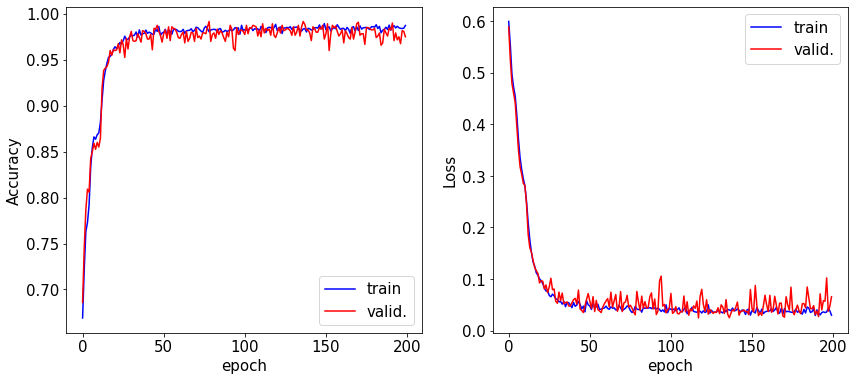

In [42]:
fig,AX=plt.subplots(1,2,figsize=(14,6.))
ax=AX[0]
ax.plot(history_increased.history['accuracy'],label="train",c="b")
ax.plot(history_increased.history['val_accuracy'],label="valid.",c="r")
ax.set_xlabel('epoch')
ax.set_ylabel("Accuracy")
ax.legend()
ax=AX[1]
ax.plot(history_increased.history['loss'],label="train",c="b")
ax.plot(history_increased.history['val_loss'],label="valid.",c="r")
ax.set_xlabel('epoch')
ax.set_ylabel("Loss")
ax.legend()

51 2601
[50. 50.]


<function matplotlib.pyplot.show(close=None, block=None)>

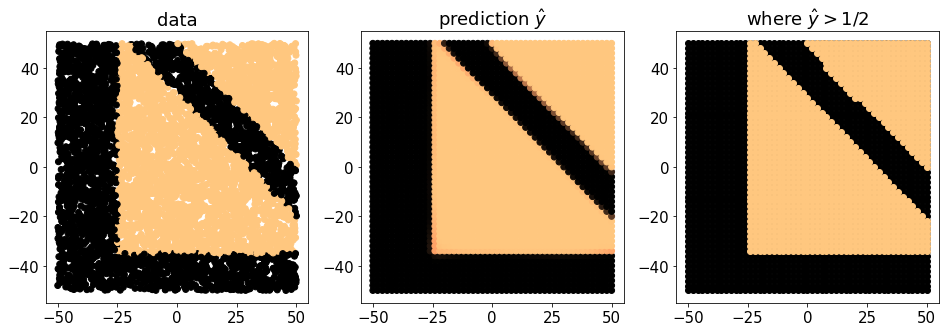

In [43]:
dX = 2
X1 = np.arange(-50,50+dX, dX)
LG = len(X1)
grid = np.zeros((LG*LG,2))
k=0
for i in range(LG):
    for j in range(LG):
        grid[k,:]=(X1[j],X1[i])
        k=k+1
print(len(X1),len(grid))
print(grid[-1])

# RESCALE

grid_r = grid/50

pred = model_increased.predict(grid_r)

fig,AX=plt.subplots(1,3,figsize=(16,5.))
ax=AX[0]
ax.scatter(x[:,0],x[:,1],c=y)
ax.set_title("data")

ax=AX[1]
ax.scatter(grid[:,0],grid[:,1],c=pred)
ax.set_title("prediction $\\hat y$")

ax=AX[2]
W1=np.where(pred>0.5)[0] 
ax.scatter(grid[:,0],grid[:,1],c="#000000")
ax.scatter(grid[W1,0],grid[W1,1],c="#ffc77f")
ax.set_title("where $\\hat y > 1/2$")
plt.show
plt.show

### Augmented number of sample

We decided to not augment the validation set since we want to obtain an accurate estimation of the error and adding artificial data would compromise the logic behind this validation procedure.
I order to augment the data we used a uniform noise applied to them. The distribution is zero centered and has a lower and maximum extremes of (-0.05, 0.05)

In [46]:
TYPE=1
x = np.loadtxt(filename("data",TYPE), delimiter=' ')
y = np.loadtxt(filename("labels",TYPE), delimiter=' ')

N=len(x)
perc_train=0.8
N_train = int(N*perc_train)

(x_train, y_train) = (x[0:N_train],y[0:N_train]) #they are already shuffle 
(x_valid, y_valid) = (x[N_train:],y[N_train:])
print("Train:",len(x_train),"\t Validation:",len(x_valid))

x_aug = x_train + np.random.uniform(-0.05, 0.05, size=x_train.shape)
y_aug = np.copy(y_train)

x_train = np.vstack((x_train, x_aug))
y_train = np.hstack((y_train, y_aug))
print('After augmentation')
print("Train:",len(x_train),"\t Validation:",len(x_valid))

x_train = Rescale(x_train)
x_valid = Rescale(x_valid)

Train: 3200 	 Validation: 800
After augmentation
Train: 6400 	 Validation: 800


In [47]:
#optimization
nepochs=200
model_augmented = compile_model(optimizer=grid_result.best_params_['optimizer'], 
                              act_func=grid_result.best_params_['act_func'],
                              neurons=grid_result.best_params_['model__neurons'])

history_augmented = model_augmented.fit(x_train, y_train,
                                      epochs = nepochs,
                                      batch_size = grid_result.best_params_['batch_size'],
                                      validation_data=(x_valid,y_valid),
                                      verbose=1)

Epoch 1/200
640/640 [==============================] - 3s 3ms/step - loss: 0.6124 - accuracy: 0.6828 - val_loss: 0.5852 - val_accuracy: 0.7175
Epoch 2/200
640/640 [==============================] - 1s 2ms/step - loss: 0.5410 - accuracy: 0.7441 - val_loss: 0.4948 - val_accuracy: 0.7613
Epoch 3/200
640/640 [==============================] - 1s 2ms/step - loss: 0.4798 - accuracy: 0.7748 - val_loss: 0.4654 - val_accuracy: 0.7825
Epoch 4/200
640/640 [==============================] - 1s 2ms/step - loss: 0.4566 - accuracy: 0.7884 - val_loss: 0.4538 - val_accuracy: 0.7937
Epoch 5/200
640/640 [==============================] - 1s 2ms/step - loss: 0.4246 - accuracy: 0.7966 - val_loss: 0.4027 - val_accuracy: 0.8112
Epoch 6/200
640/640 [==============================] - 1s 2ms/step - loss: 0.3958 - accuracy: 0.8075 - val_loss: 0.3822 - val_accuracy: 0.8012
Epoch 7/200
640/640 [==============================] - 1s 2ms/step - loss: 0.3732 - accuracy: 0.8144 - val_loss: 0.3713 - val_accuracy: 0.8250

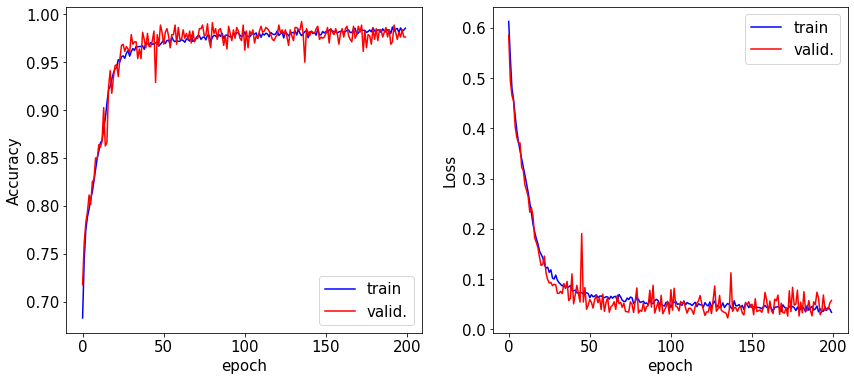

In [48]:
fig,AX=plt.subplots(1,2,figsize=(14,6.))
ax=AX[0]
ax.plot(history_augmented.history['accuracy'],label="train",c="b")
ax.plot(history_augmented.history['val_accuracy'],label="valid.",c="r")
ax.set_xlabel('epoch')
ax.set_ylabel("Accuracy")
ax.legend()
ax=AX[1]
ax.plot(history_augmented.history['loss'],label="train",c="b")
ax.plot(history_augmented.history['val_loss'],label="valid.",c="r")
ax.set_xlabel('epoch')
ax.set_ylabel("Loss")
ax.legend()

51 2601
[50. 50.]


<function matplotlib.pyplot.show(close=None, block=None)>

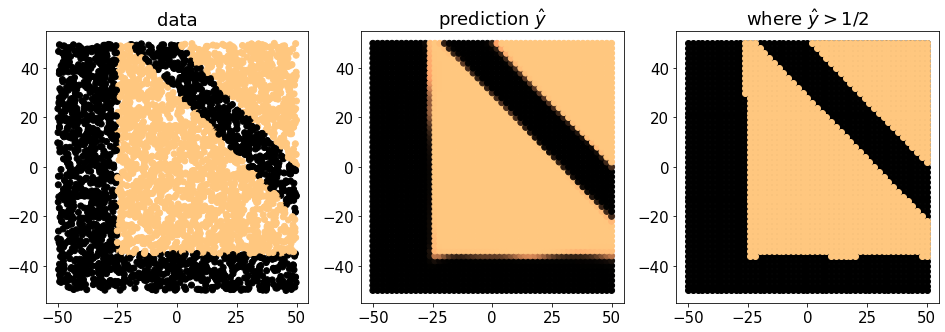

In [49]:
dX = 2
X1 = np.arange(-50,50+dX, dX)
LG = len(X1)
grid = np.zeros((LG*LG,2))
k=0
for i in range(LG):
    for j in range(LG):
        grid[k,:]=(X1[j],X1[i])
        k=k+1
print(len(X1),len(grid))
print(grid[-1])

# RESCALE

grid_r = grid/50

pred = model_augmented.predict(grid_r)

fig,AX=plt.subplots(1,3,figsize=(16,5.))
ax=AX[0]
ax.scatter(x[:,0],x[:,1],c=y)
ax.set_title("data")

ax=AX[1]
ax.scatter(grid[:,0],grid[:,1],c=pred)
ax.set_title("prediction $\\hat y$")

ax=AX[2]
W1=np.where(pred>0.5)[0] 
ax.scatter(grid[:,0],grid[:,1],c="#000000")
ax.scatter(grid[W1,0],grid[W1,1],c="#ffc77f")
ax.set_title("where $\\hat y > 1/2$")
plt.show
plt.show

## Ex.3 Non linearly seperable data

In [50]:
TYPE = 2

x = np.loadtxt(filename("data",TYPE), delimiter=' ')
y = np.loadtxt(filename("labels",TYPE), delimiter=' ')
N = len(x)

# dim. of a sample
L = len(x[0])
print(f'Dimension of a sample{L}')

#training percentage
perc_train = 0.8

N_train = int(perc_train * N)
print(f'data: {N}\ntrain: {N_train}')

Dimension of a sample2
data: 4000
train: 3200


In [51]:
### Split training and test data
(x_train, y_train) = (x[0:N_train],y[0:N_train]) #they are already shuffle 
(x_valid, y_valid) = (x[N_train:],y[N_train:])
print("Train:",len(x_train),"\t Validation:",len(x_valid))

Train: 3200 	 Validation: 800


In [52]:
def Rescale(x):
    return x/50 #the number goes from -50 to 50, so we put them between -1 and 1 to use the non linearity 

x_train = Rescale(x_train)
x_valid = Rescale(x_valid)

#### Modyfing the architecture, adding 2 more layers,  allowed the network to learn a more complex data distribution

In [55]:
def create_DNN(act_func, neurons): 
    model = Sequential() #empty template of the neural network
    model.add(Dense(L,input_shape=(L,),activation=act_func)) #add a layer dense (all connection) with a ReLu 2 neuron for 2 x_i
    model.add(Dense(units=neurons,activation=act_func))
    model.add(Dense(units=neurons,activation=act_func))
    model.add(Dense(units=neurons,activation=act_func))
    model.add(Dense(units=neurons,activation=act_func))
    model.add(Dense(units=neurons,activation=act_func))
    model.add(Dropout(0.01)) #it is applied to the last layer, need to be reader in keras documentation 
    model.add(Dense(1,activation='sigmoid'))

    return model 

In [56]:
def compile_model(optimizer='adam', act_func='relu', neurons=20):
    model = create_DNN(act_func, neurons)
    model.compile(loss='binary_crossentropy',
                  optimizer=optimizer,
                  metrics=['accuracy'])    
    return model

In [59]:
model_nonlinear = compile_model(optimizer=grid_result.best_params_['optimizer'], 
                              act_func='ReLU',
                              neurons=grid_result.best_params_['model__neurons'])

nepoch=400
history_nonlinear = model_nonlinear.fit(x_train, y_train,
               epochs = nepoch, batch_size = grid_result.best_params_['batch_size'],
               validation_data=(x_valid,y_valid),
               verbose=1)

Epoch 1/400
320/320 [==============================] - 2s 4ms/step - loss: 0.6930 - accuracy: 0.5253 - val_loss: 0.6949 - val_accuracy: 0.4863
Epoch 2/400
320/320 [==============================] - 1s 3ms/step - loss: 0.6922 - accuracy: 0.5113 - val_loss: 0.6919 - val_accuracy: 0.5163
Epoch 3/400
320/320 [==============================] - 1s 3ms/step - loss: 0.6908 - accuracy: 0.5219 - val_loss: 0.6937 - val_accuracy: 0.5250
Epoch 4/400
320/320 [==============================] - 1s 3ms/step - loss: 0.6893 - accuracy: 0.5431 - val_loss: 0.6906 - val_accuracy: 0.5138
Epoch 5/400
320/320 [==============================] - 1s 3ms/step - loss: 0.6869 - accuracy: 0.5394 - val_loss: 0.6875 - val_accuracy: 0.5300
Epoch 6/400
320/320 [==============================] - 1s 3ms/step - loss: 0.6812 - accuracy: 0.5456 - val_loss: 0.6780 - val_accuracy: 0.5300
Epoch 7/400
320/320 [==============================] - 1s 3ms/step - loss: 0.6696 - accuracy: 0.5650 - val_loss: 0.6708 - val_accuracy: 0.5700

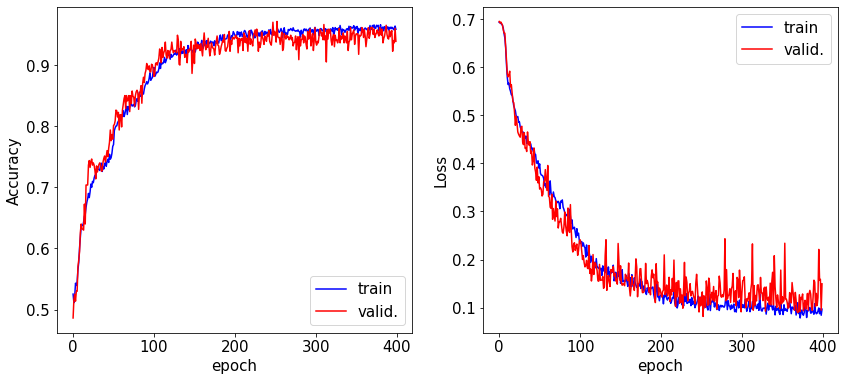

In [60]:
fig,AX=plt.subplots(1,2,figsize=(14,6.))
ax=AX[0]
ax.plot(history_nonlinear.history['accuracy'],label="train",c="b")
ax.plot(history_nonlinear.history['val_accuracy'],label="valid.",c="r")
ax.set_xlabel('epoch')
ax.set_ylabel("Accuracy")
ax.legend()
ax=AX[1]
ax.plot(history_nonlinear.history['loss'],label="train",c="b")
ax.plot(history_nonlinear.history['val_loss'],label="valid.",c="r")
ax.set_xlabel('epoch')
ax.set_ylabel("Loss")
ax.legend()

51 2601
[50. 50.]


<function matplotlib.pyplot.show(close=None, block=None)>

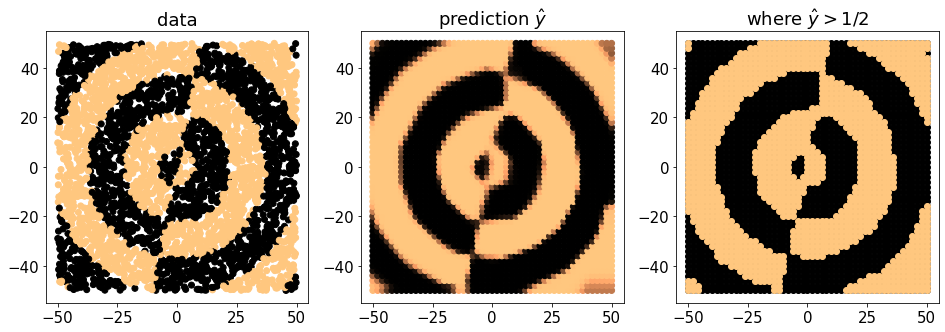

In [61]:
dX = 2
X1 = np.arange(-50,50+dX, dX)
LG = len(X1)
grid = np.zeros((LG*LG,2))
k=0
for i in range(LG):
    for j in range(LG):
        grid[k,:]=(X1[j],X1[i])
        k=k+1
print(len(X1),len(grid))
print(grid[-1])

# RESCALE

grid_r = grid/50

pred = model_nonlinear.predict(grid_r)

fig,AX=plt.subplots(1,3,figsize=(16,5.))
ax=AX[0]
ax.scatter(x[:,0],x[:,1],c=y)
ax.set_title("data")

ax=AX[1]
ax.scatter(grid[:,0],grid[:,1],c=pred)
ax.set_title("prediction $\\hat y$")

ax=AX[2]
W1=np.where(pred>0.5)[0] 
ax.scatter(grid[:,0],grid[:,1],c="#000000")
ax.scatter(grid[W1,0],grid[W1,1],c="#ffc77f")
ax.set_title("where $\\hat y > 1/2$")

plt.show
plt.show